In [1]:
import pandas as pd
from fbprophet import Prophet

In [3]:
holidays = pd.read_csv('us_holidays.csv')
holidays.head()

,holiday,ds,lower_window,upper_window
0,New Year Day,1/1/2021,0,1
1,Martin Luther King Jr. Day,1/18/2021,0,1
2,Presidents Day (Washingtons Birthday),2/15/2021,0,1
3,Good Friday,4/2/2021,0,1
4,Memorial Day,5/10/2021,0,1


In [4]:
df = pd.read_csv('calendar.csv')
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,$125.00,$125.00,30.0,90.0
1,2595,2021-01-09,t,$175.00,$175.00,30.0,1125.0
2,2595,2021-01-10,t,$175.00,$175.00,30.0,1125.0
3,2595,2021-01-11,t,$175.00,$175.00,30.0,1125.0
4,2595,2021-01-12,t,$175.00,$175.00,30.0,1125.0


In [10]:
df.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

In [7]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,125.00,$125.00,30.0,90.0
1,2595,2021-01-09,t,175.00,$175.00,30.0,1125.0
2,2595,2021-01-10,t,175.00,$175.00,30.0,1125.0
3,2595,2021-01-11,t,175.00,$175.00,30.0,1125.0
4,2595,2021-01-12,t,175.00,$175.00,30.0,1125.0
...,...,...,...,...,...,...,...
13554645,46867150,2022-01-06,f,175.00,$175.00,3.0,1125.0
13554646,46867150,2022-01-07,f,175.00,$175.00,3.0,1125.0
13554647,46867150,2022-01-08,f,175.00,$175.00,3.0,1125.0
13554648,46867150,2022-01-09,f,175.00,$175.00,3.0,1125.0


In [8]:
df['price'] = df['price'].astype(float)

In [9]:
df['date']= pd.to_datetime(df['date'])

In [11]:
calendar_2021 = df.loc[df['date'] < "2022-1-1"]
calendar_2021

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,125.0,$125.00,30.0,90.0
1,2595,2021-01-09,t,175.0,$175.00,30.0,1125.0
2,2595,2021-01-10,t,175.0,$175.00,30.0,1125.0
3,2595,2021-01-11,t,175.0,$175.00,30.0,1125.0
4,2595,2021-01-12,t,175.0,$175.00,30.0,1125.0
...,...,...,...,...,...,...,...
13554635,46867150,2021-12-27,f,175.0,$175.00,3.0,1125.0
13554636,46867150,2021-12-28,f,175.0,$175.00,3.0,1125.0
13554637,46867150,2021-12-29,f,175.0,$175.00,3.0,1125.0
13554638,46867150,2021-12-30,f,175.0,$175.00,3.0,1125.0


In [12]:
calendar_2021 = calendar_2021.loc[calendar_2021['available'] == "t"]
calendar_2021

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,125.0,$125.00,30.0,90.0
1,2595,2021-01-09,t,175.0,$175.00,30.0,1125.0
2,2595,2021-01-10,t,175.0,$175.00,30.0,1125.0
3,2595,2021-01-11,t,175.0,$175.00,30.0,1125.0
4,2595,2021-01-12,t,175.0,$175.00,30.0,1125.0
...,...,...,...,...,...,...,...
13554460,46867150,2021-07-05,t,175.0,$175.00,3.0,1125.0
13554461,46867150,2021-07-06,t,175.0,$175.00,3.0,1125.0
13554462,46867150,2021-07-07,t,175.0,$175.00,3.0,1125.0
13554463,46867150,2021-07-08,t,175.0,$175.00,3.0,1125.0


In [13]:
calendar_model = calendar_2021.groupby(['date']).mean().reset_index()
calendar_model

,date,listing_id,price,minimum_nights,maximum_nights
0,2021-01-08,3.877157e+07,270.846154,41.307692,2.202556e+08
1,2021-01-09,2.763448e+07,194.466555,27.527592,1.975196e+07
2,2021-01-10,2.817463e+07,164.166401,23.124801,1.368633e+07
3,2021-01-11,2.842510e+07,159.294189,22.271414,1.017964e+07
4,2021-01-12,2.806715e+07,157.803842,21.962349,7.485672e+06
...,...,...,...,...,...
353,2021-12-27,2.668430e+07,181.956220,37.331051,4.902963e+06
354,2021-12-28,2.667962e+07,183.071290,37.308472,4.900064e+06
355,2021-12-29,2.667055e+07,183.354279,37.358001,4.906280e+06
356,2021-12-30,2.667112e+07,185.625613,37.345224,4.903792e+06


In [14]:
calendar_model=calendar_model[['date', 'price']]
calendar_model

,date,price
0,2021-01-08,270.846154
1,2021-01-09,194.466555
2,2021-01-10,164.166401
3,2021-01-11,159.294189
4,2021-01-12,157.803842
...,...,...
353,2021-12-27,181.956220
354,2021-12-28,183.071290
355,2021-12-29,183.354279
356,2021-12-30,185.625613


In [15]:
calendar_model = calendar_model.rename(columns={"date": "ds", "price": "y"})

In [16]:
model = Prophet(holidays=holidays)
model.fit(calendar_model)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
calendar_model.tail()

,ds,y
353,2021-12-27,181.956220
354,2021-12-28,183.071290
355,2021-12-29,183.354279
356,2021-12-30,185.625613
357,2021-12-31,188.902854


In [18]:
future_df = model.make_future_dataframe(periods=365)
future_df

,ds
0,2021-01-08
1,2021-01-09
2,2021-01-10
3,2021-01-11
4,2021-01-12
...,...
718,2022-12-27
719,2022-12-28
720,2022-12-29
721,2022-12-30


In [19]:
predictions = model.predict(future_df)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Eve,Christmas Eve_lower,Christmas Eve_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Good Friday,Good Friday_lower,Good Friday_upper,Independence Day,Independence Day_lower,Independence Day_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year Day,New Year Day_lower,New Year Day_upper,New Year's Eve,New Year's Eve_lower,New Year's Eve_upper,Presidents Day (Washingtons Birthday),Presidents Day (Washingtons Birthday)_lower,Presidents Day (Washingtons Birthday)_upper,Thanksgiving Day,Thanksgiving Day_lower,Thanksgiving Day_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-08,172.487910,169.072576,184.158665,172.487910,172.487910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.034852,4.034852,4.034852,0.000000,0.000000,0.000000,4.034852,4.034852,4.034852,0.0,0.0,0.0,176.522762
1,2021-01-09,171.851143,167.168901,181.515601,171.851143,171.851143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.677418,2.677418,2.677418,0.000000,0.000000,0.000000,2.677418,2.677418,2.677418,0.0,0.0,0.0,174.528560
2,2021-01-10,171.214376,162.364106,177.020737,171.214376,171.214376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.645310,-1.645310,-1.645310,0.000000,0.000000,0.000000,-1.645310,-1.645310,-1.645310,0.0,0.0,0.0,169.569066
3,2021-01-11,170.577608,161.423159,176.017451,170.577608,170.577608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.540031,-1.540031,-1.540031,0.000000,0.000000,0.000000,-1.540031,-1.540031,-1.540031,0.0,0.0,0.0,169.037577
4,2021-01-12,169.940841,161.196250,176.180067,169.940841,169.940841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.252934,-1.252934,-1.252934,0.000000,0.000000,0.000000,-1.252934,-1.252934,-1.252934,0.0,0.0,0.0,168.687908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2022-12-27,218.569206,129.610588,300.796936,130.163458,303.563656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.252934,-1.252934,-1.252934,0.000000,0.000000,0.000000,-1.252934,-1.252934,-1.252934,0.0,0.0,0.0,217.316272
719,2022-12-28,218.669220,129.652886,301.429691,129.892461,303.790476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.174399,-1.174399,-1.174399,0.000000,0.000000,0.000000,-1.174399,-1.174399,-1.174399,0.0,0.0,0.0,217.494821
720,2022-12-29,218.769234,128.031105,301.061150,129.632628,304.017295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.099596,-1.099596

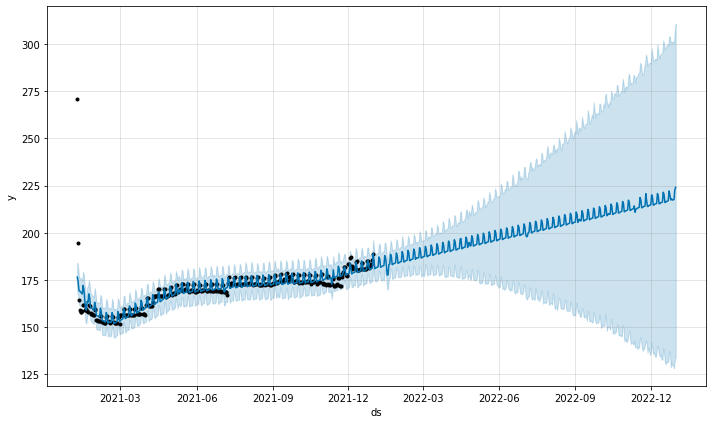

In [21]:
trends = model.plot(predictions)

In [22]:
calendar_model.describe

<bound method NDFrame.describe of             ds           y
0   2021-01-08  270.846154
1   2021-01-09  194.466555
2   2021-01-10  164.166401
3   2021-01-11  159.294189
4   2021-01-12  157.803842
..         ...         ...
353 2021-12-27  181.956220
354 2021-12-28  183.071290
355 2021-12-29  183.354279
356 2021-12-30  185.625613
357 2021-12-31  188.902854

[358 rows x 2 columns]>

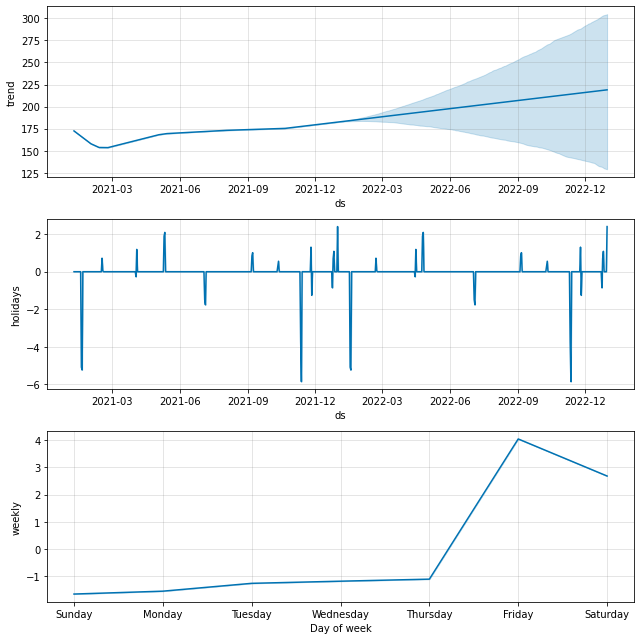

In [23]:
seasonality = model.plot_components(predictions)